In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
two_blobs = pd.read_csv('./DATA/cluster_two_blobs.csv')

In [4]:
two_blobs_outliers = pd.read_csv('./DATA/cluster_two_blobs_outliers.csv')

<Axes: xlabel='X1', ylabel='X2'>

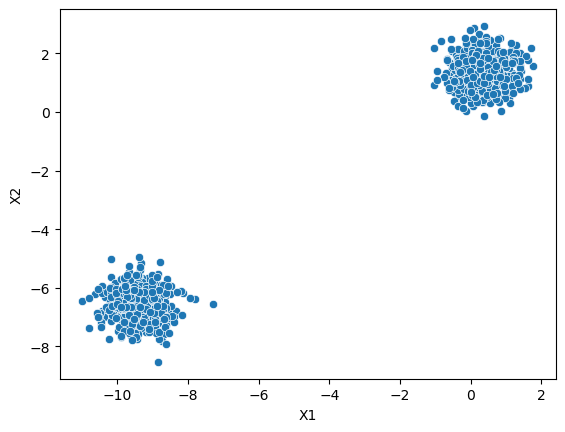

In [6]:
sns.scatterplot(data=two_blobs,x='X1', y='X2')

<Axes: xlabel='X1', ylabel='X2'>

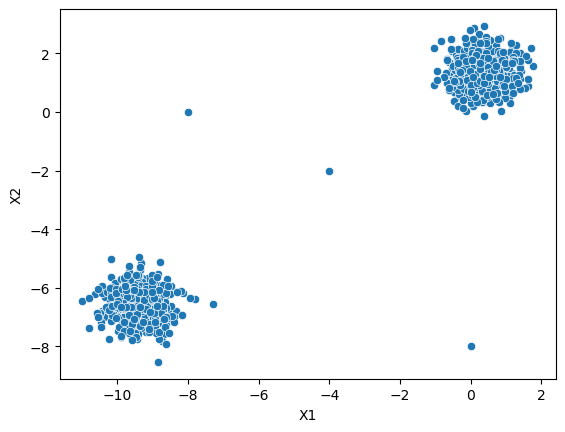

In [7]:
sns.scatterplot(data=two_blobs_outliers,x='X1', y='X2')

In [19]:
def display_categories(model,data):
    labels=model.fit_predict(data)
    sns.scatterplot(data=data, x='X1', y='X2', hue=labels, palette='Set1')

In [12]:
from sklearn.cluster import DBSCAN

In [13]:
dbscan=DBSCAN()

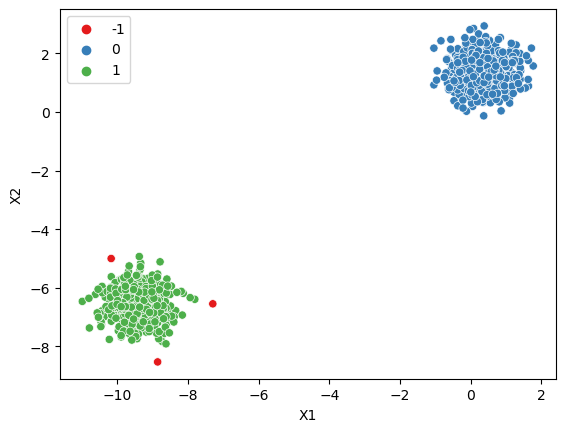

In [20]:
display_categories(dbscan, two_blobs)

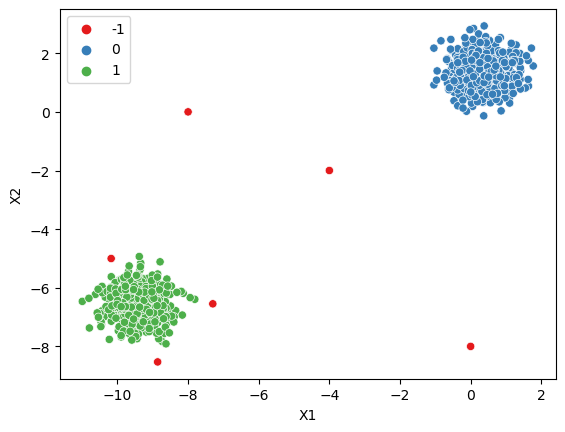

In [21]:
display_categories(dbscan, two_blobs_outliers)

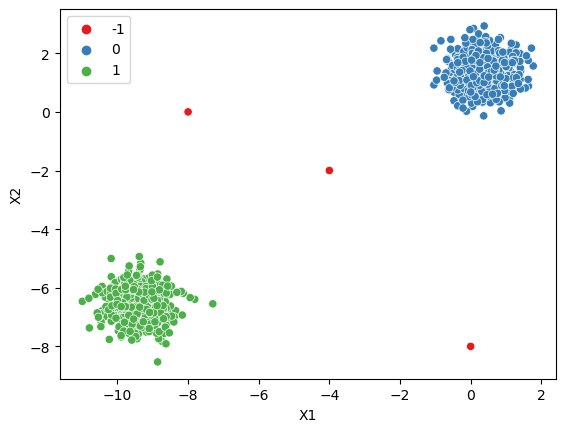

In [93]:
dbscan = DBSCAN(eps=0.75)
display_categories(dbscan, two_blobs_outliers)

In [27]:
#total outliers found
np.sum(dbscan.labels_ == -1)

3

In [29]:
np.sum(dbscan.labels_ == -1)/(len(dbscan.labels_==-1))*100

0.29910269192422734

In [31]:
len(dbscan.labels_==-1)

1003

In [78]:
outlier_percent=[]
number_of_outliers = []

for eps in np.linspace(0.1,10,100):
    dbscan=DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
    number_of_outliers.append(np.sum(dbscan.labels_==-1))
    outlier_percent.append(np.sum(dbscan.labels_==-1)/len(dbscan.labels_==-1)*100)

C:\Users\BRAVO15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\BRAVO15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

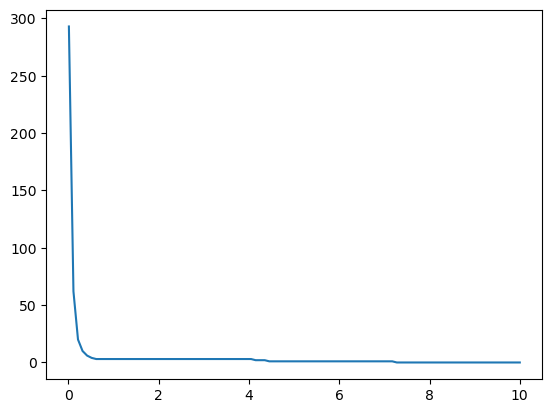

In [79]:
sns.lineplot(x=np.linspace(0.01,10,100), y= number_of_outliers)


In [87]:
sns.lineplot(x=np.linspace(0.01,10,100), y= number_of_outliers)
plt.xlim(0.01,2)


ValueError: All arrays must be of the same length

In [88]:
outlier_percent=[]
number_of_outliers = []

for eps in np.linspace(0.001,7,200):
    dbscan=DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
    number_of_outliers.append(np.sum(dbscan.labels_==-1))
    outlier_percent.append(np.sum(dbscan.labels_==-1)/len(dbscan.labels_==-1)*100)

C:\Users\BRAVO15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\BRAVO15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


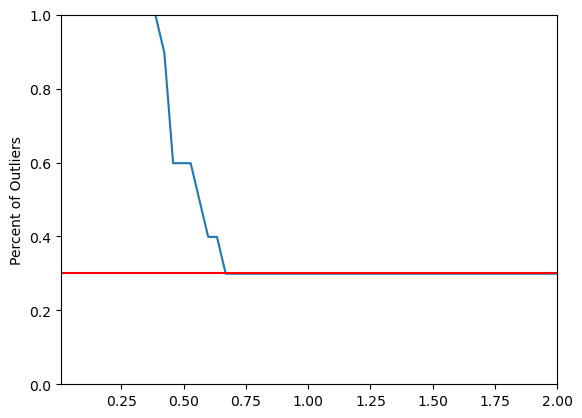

In [92]:
sns.lineplot(x=np.linspace(0.001,7,200), y= outlier_percent)
plt.xlim(0.01,2)
plt.ylabel('Percent of Outliers')
plt.ylim(0,1)
plt.hlines(y=0.3,xmin=0, xmax=2, color='red')

In [94]:
outlier_percent=[]
number_of_outliers = []

for min_samples in np.arange(1,100):
    dbscan=DBSCAN(min_samples=min_samples)
    dbscan.fit(two_blobs_outliers)
    number_of_outliers.append(np.sum(dbscan.labels_==-1))
    outlier_percent.append(np.sum(dbscan.labels_==-1)/len(dbscan.labels_==-1)*100)

C:\Users\BRAVO15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\BRAVO15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

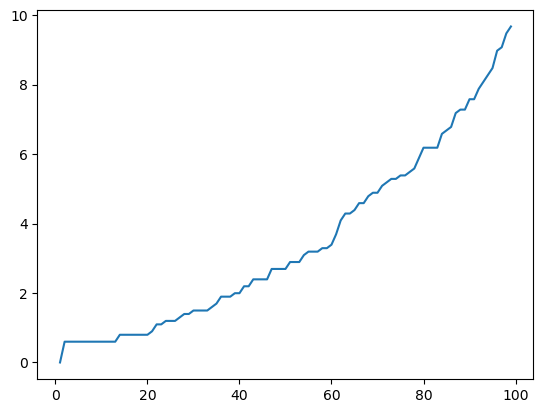

In [95]:
sns.lineplot(x=np.arange(1,100), y= outlier_percent)


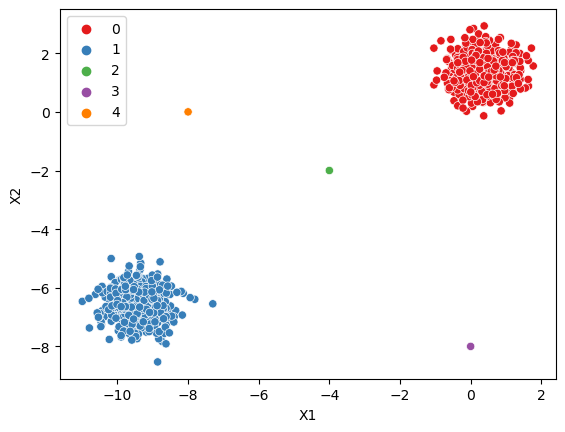

In [97]:
#useful to find single cluster points
dbscan = DBSCAN(eps=0.75, min_samples=1)
display_categories(dbscan, two_blobs_outliers)

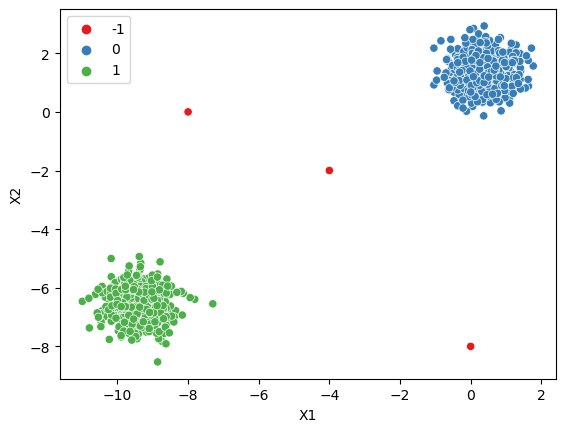

In [103]:
num_dim=len(two_blobs_outliers.columns)
dbscan = DBSCAN(eps=0.75, min_samples=2*num_dim)
display_categories(dbscan, two_blobs_outliers)